**Problem - 1: Perform a classification task with knn from scratch.**

1. Load the Dataset:

In [ ]:
import pandas as pd

#1 Read the dataset into a pandas DataFrame.
file_path = "/content/drive/MyDrive/Datasets-20241203T015332Z-001/Datasets/diabetes.csv"
df = pd.read_csv(file_path)

#2 Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nSummary statistics for numerical columns:")
print(df.describe())

print("\nData types of the columns:")
print(df.dtypes)


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Ou

2. Handle Missing Data:

In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/Datasets-20241203T015332Z-001/Datasets/diabetes.csv"
df = pd.read_csv(file_path)

print("Missing values in each column:")
print(df.isnull().sum())
#1 Handle any missing values appropriately, either by dropping or imputing them based on the data.
df.fillna(df.mean(), inplace=True)
print("\nMissing values in each column after handling:")
print(df.isnull().sum())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values in each column after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


3. Feature Engineering:

In [ ]:
import pandas as pd
import numpy as np
file_path = "/content/drive/MyDrive/Datasets-20241203T015332Z-001/Datasets/diabetes.csv"
df = pd.read_csv(file_path)

#1 Separate the feature matrix (X) and target variable (y).
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

#2 Perform a train - test split from scratch using a 70% − 30% ratio.
np.random.seed(42)
indices = np.random.permutation(len(df))
split_index = int(0.7 * X.shape[0])
X_train = X[indices[:split_index]]
y_train = y[indices[:split_index]]
X_test = X[indices[split_index:]]
y_test = y[indices[split_index:]]

print("The training set shapes: X_train =", X_train.shape, ", y_train =", y_train.shape)
print("The test set shapes: X_test =", X_test.shape, ", y_test =", y_test.shape)

The training set shapes: X_train = (537, 8) , y_train = (537,)
The test set shapes: X_test = (231, 8) , y_test = (231,)


4. Implement KNN:

In [ ]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k):
        self.k = k  # Number of nearest neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X_test):
        predictions = [self.predict_single(x) for x in X_test]
        return np.array(predictions)
k = 3
knn = KNN(k=k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"KNN Accuracy: {accuracy:.2f}")


KNN Accuracy: 0.70


**Problem - 2 - Experimentation:**

In [ ]:
# 1
import numpy as np
from collections import Counter
import pandas as pd
file_path = "/content/drive/MyDrive/Datasets-20241203T015332Z-001/Datasets/diabetes.csv"
df = pd.read_csv(file_path)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X_test):
        predictions = [self.predict_single(x) for x in X_test]
        return np.array(predictions)

def standardize(X):
  return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_train_scaled = standardize(X_train)
X_test_scaled = standardize(X_test)
k = 3
knn = KNN(k=k)
knn.fit(X_train_scaled, y_train)
predictions = knn.predict(X_test_scaled)
accuracy = np.mean(predictions == y_test)
print(f"KNN  Accuracy: {accuracy:.2f}")

KNN  Accuracy: 0.73


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = "/content/drive/MyDrive/Datasets-20241203T015332Z-001/Datasets/diabetes.csv"
df = pd.read_csv(file_path)

X = df.drop('Outcome', axis=1).values  # Features
y = df['Outcome'].values  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Training kNN on the original dataset
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)

# Evaluate the performance on the original dataset
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy on original dataset:", accuracy_original)
print("Confusion Matrix (Original Dataset):\n", confusion_matrix(y_test, y_pred_original))
print("Classification Report (Original Dataset):\n", classification_report(y_test, y_pred_original))

# 2. Scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training kNN on the scaled dataset
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate the performance on the scaled dataset
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("\nAccuracy on scaled dataset:", accuracy_scaled)
print("Confusion Matrix (Scaled Dataset):\n", confusion_matrix(y_test, y_pred_scaled))
print("Classification Report (Scaled Dataset):\n", classification_report(y_test, y_pred_scaled))

# 3. Comparison Summary
print("\nComparison Summary:")
print(f"Accuracy (Original Dataset): {accuracy_original}")
print(f"Accuracy (Scaled Dataset): {accuracy_scaled}")


Accuracy on original dataset: 0.6883116883116883
Confusion Matrix (Original Dataset):
 [[114  37]
 [ 35  45]]
Classification Report (Original Dataset):
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231


Accuracy on scaled dataset: 0.7012987012987013
Confusion Matrix (Scaled Dataset):
 [[119  32]
 [ 37  43]]
Classification Report (Scaled Dataset):
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231


Comparison Summary:
Accuracy (Original Datas

How Scaling Influences KNN Performance:
KNN calculates distances between data points to make predictions, and differences in feature scales can significantly impact these calculations. When one feature has a much larger range than others, it can dominate the distance metric, leading to biased predictions. Scaling ensures that all features are normalized to have equal influence, preventing any single feature from disproportionately affecting the results. This equalization allows KNN to consider all features fairly, leading to improved prediction accuracy, particularly when features have varying units or scales.

Why Accuracy Changes with Scaling:
Scaling typically enhances KNN accuracy by removing the bias caused by features with larger ranges. When data is scaled, all features contribute equally, resulting in more reliable predictions. If the features already have similar ranges, scaling may have little to no impact on accuracy. In rare cases, it could even slightly reduce accuracy due to minor numerical errors. However, for datasets with features of diverse ranges, scaling generally improves the algorithm’s performance significantly.

**Problem - 3 - Experimentation with k:**

k | Accuracy (Original) | Time (Original) | Accuracy (Scaled) | Time (Scaled)
1 | 61.69% | 0.7130s | 72.08% | 1.3708s
2 | 61.69% | 1.1648s | 72.08% | 0.6191s
3 | 68.18% | 0.6278s | 73.38% | 0.5867s
4 | 67.53% | 0.6071s | 75.32% | 1.0510s
5 | 70.13% | 1.0830s | 72.73% | 1.0491s
6 | 69.48% | 1.0842s | 76.62% | 0.6842s
7 | 72.08% | 0.6535s | 74.03% | 0.6564s
8 | 70.78% | 0.6498s | 74.03% | 0.6469s
9 | 70.78% | 0.5997s | 73.38% | 0.6035s
10 | 70.13% | 0.6006s | 76.62% | 0.5970s
11 | 71.43% | 0.6052s | 73.38% | 0.5874s
12 | 72.08% | 0.6791s | 75.97% | 0.6461s
13 | 72.08% | 0.6048s | 75.32% | 0.6191s
14 | 71.43% | 0.6143s | 75.97% | 1.0782s
15 | 70.78% | 1.2482s | 75.97% | 1.0450s


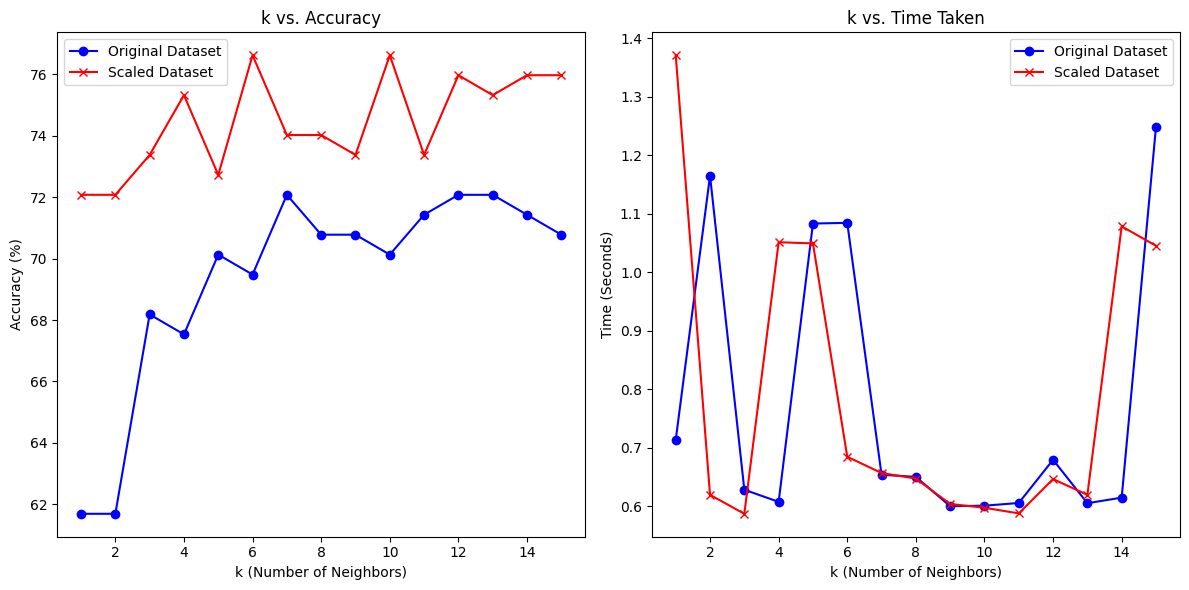

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import time
import matplotlib.pyplot as plt

Euclidean_Distance = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train, self.y_train = X, y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [Euclidean_Distance(x, x_train) for x_train in self.X_train]
        k_nearest = [self.y_train[i] for i in np.argsort(distances)[:self.k]]
        return Counter(k_nearest).most_common(1)[0][0]

def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

file_path = "/content/drive/MyDrive/Datasets-20241203T015332Z-001/Datasets/diabetes.csv"
df = pd.read_csv(file_path)

X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

k_values = list(range(1, 16))
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    knn = KNN(k=k)

    knn.fit(X_train, y_train)
    start_time = time.time()
    y_pred_original = knn.predict(X_test)
    time_taken_original = time.time() - start_time

    accuracy_original.append(np.mean(y_test == y_pred_original) * 100)
    time_original.append(time_taken_original)

    X_train_scaled = standardize(X_train)
    X_test_scaled = standardize(X_test)
    knn.fit(X_train_scaled, y_train)
    start_time = time.time()
    y_pred_scaled = knn.predict(X_test_scaled)
    time_taken_scaled = time.time() - start_time

    accuracy_scaled.append(np.mean(y_test == y_pred_scaled) * 100)
    time_scaled.append(time_taken_scaled)

print("k | Accuracy (Original) | Time (Original) | Accuracy (Scaled) | Time (Scaled)")
for i, k in enumerate(k_values):
    print(f"{k} | {accuracy_original[i]:.2f}% | {time_original[i]:.4f}s | {accuracy_scaled[i]:.2f}% | {time_scaled[i]:.4f}s")

# Plot results
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Dataset', marker='o', color='b')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset', marker='x', color='r')
plt.title('k vs. Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.legend()

# Time plot
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Dataset', marker='o', color='b')
plt.plot(k_values, time_scaled, label='Scaled Dataset', marker='x', color='r')
plt.title('k vs. Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (Seconds)')
plt.legend()

plt.tight_layout()
plt.show()


Both computation time and accuracy are influenced by the value of
𝑘
k. For scaled data, the highest accuracy of 76.62% is achieved at
𝑘
=
6
k=6 and
𝑘
=
10
k=10. For the original data, the maximum accuracy is 72.08%, observed at
𝑘
=
7
k=7 and
𝑘
=
12
k=12. Scaling the data enhances accuracy overall. However, larger
𝑘
k values, such as
𝑘
=
4
k=4,
𝑘
=
14
k=14, and
𝑘
=
15
k=15, require more computation time. Considering both accuracy and computation time,
𝑘
=
6
k=6 emerges as the optimal choice, offering the best accuracy with manageable computation time.